In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'WA_Fn-UseC_-HR-Employee-Attrition.csv'

In [24]:
import seaborn as sns

In [25]:
import matplotlib.pyplot as plt

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df.head()

NameError: name 'df' is not defined

In [352]:
# # UNDERSAMPLING
# # # Separate the majority and minority classes
# majority_class = 'No'
# minority_class = 'Yes'

# majority_df = df[df['Attrition'] == majority_class]
# minority_df = df[df['Attrition'] == minority_class]

# # # Randomly sample rows from the majority class to make it balanced
# # # You can adjust the sample size based on your preference
# sample_size = len(minority_df)

# # # Randomly select rows from the majority class
# majority_sampled = majority_df.sample(n=sample_size, random_state=42)

# # # Concatenate the minority class DataFrame with the sampled majority class DataFrame
# df = pd.concat([majority_sampled, minority_df])

# # # Shuffle the DataFrame to ensure randomness
# df= df.sample(frac=1, random_state=42).reset_index(drop=True)
# df.shape

In [353]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split

# # Assuming you have a DataFrame named 'df' and the dependent variable is 'Attrition'
# # Replace 'Attrition' with the actual column name

# # Separate the features and the target variable
# X = df.drop('Attrition', axis=1)
# y = df['Attrition']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Concatenate the training features and target variable
# train_data = pd.concat([X_train, y_train], axis=1)

# # Count the number of occurrences of each class
# class_counts = train_data['Attrition'].value_counts()

# # Find the class with fewer occurrences
# minority_class = class_counts.idxmin()

# # Create a SMOTE object
# smote = SMOTE(sampling_strategy='auto', random_state=42)

# # Fit and apply SMOTE to the training data
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Concatenate the resampled features and target variable
# df = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# # Now 'train_data_resampled' contains the balanced dataset
# df.shape

In [4]:
# OVERSAMPLING

import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame named 'df' and the dependent variable is 'Attrition'
# Replace 'Attrition' with the actual column name

# Separate the features and the target variable
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Concatenate the training features and target variable
train_data = pd.concat([X_train, y_train], axis=1)

# Count the number of occurrences of each class
class_counts = train_data['Attrition'].value_counts()

# Find the class with fewer occurrences
minority_class = class_counts.idxmin()

# Get the number of occurrences of the minority class
minority_class_count = class_counts[minority_class]

# Set the desired number of samples for each class (e.g., the number of the majority class)
desired_count = class_counts.max()

# Calculate the number of samples to add for each class
samples_to_add = desired_count - minority_class_count

# Create a RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy={minority_class: samples_to_add}, random_state=42)

# Fit and apply the oversampler to the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Concatenate the resampled features and target variable
df = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Now 'train_data_resampled' contains the balanced dataset

# If you want to use the resampled data for training a model, you can use 'X_train_resampled' and 'y_train_resampled'
df.shape

ModuleNotFoundError: No module named 'imblearn'

In [355]:
data = pd.get_dummies(df, columns=["BusinessTravel","Department", "Education","EducationField","EmployeeCount","EnvironmentSatisfaction","Gender","JobInvolvement", "JobLevel","JobRole","JobSatisfaction","MaritalStatus","Over18","OverTime","PerformanceRating","RelationshipSatisfaction", "WorkLifeBalance"], drop_first=True )
data = data.drop(["Age","Attrition", "DailyRate", "DistanceFromHome","EmployeeNumber","HourlyRate","MonthlyIncome","MonthlyRate","NumCompaniesWorked","PercentSalaryHike","StandardHours","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"],axis= 1)

In [356]:
data= pd.concat([df,data], axis=1)
data

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_2,Education_3,Education_4,Education_5,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Male,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PerformanceRating_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,24,Travel_Rarely,350,Research & Development,21,2,Technical Degree,1,1551,3,Male,57,2,1,Laboratory Technician,1,Divorced,2296,10036,0,Y,No,14,3,2,80,3,2,3,3,1,1,0,0,No,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,18,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0,No,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
2,29,Travel_Rarely,1247,Sales,20,2,Marketing,1,349,4,Male,45,3,2,Sales Executive,4,Divorced,6931,10732,2,Y,No,14,3,4,80,1,10,2,3,3,2,0,2,No,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,39,Travel_Rarely,492,Research & Development,12,3,Medical,1,1654,4,Male,66,3,2,Manufacturing Director,2,Married,5295,7693,4,Y,No,21,4,3,80,0,7,3,3,5,4,1,0,No,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
4,31,Travel_Rarely,311,Research & Development,20,3,Life Sciences,1,1881,2,Male,89,3,2,Laboratory Technician,3,Divorced,4197,18624,1,Y,No,11,3,1,80,1,10,2,3,10,8,0,2,No,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,24,Travel_Rarely,984,Research & Development,17,2,Life Sciences,1,1219,4,Female,97,3,1,Laboratory Technician,2,Married,2210,3372,1,Y,No,13,3,1,80,1,1,3,1,1,0,0,0,Yes,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1754,38,Travel_Rarely,1180,Research & Development,29,1,Medical,1,282,2,Male,70,3,2,Healthcare Representative,1,Married,6673,11354,7,Y,Yes,19,3,2,80,0,17,2,3,1,0,0,0,Yes,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0
1755,27,Travel_Frequently,1337,Human Resources,22,3,Human Resources,1,1944,1,Female,58,2,1,Human Resources,2,Married,2863,19555,1,Y,No,12,3,1,80,0,1,2,3,1,0,0,0,Yes,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1756,30,Travel_Rarely,740,Sales,1,3,Life Sciences,1,1562,2,Male,64,2,2,Sales Executive,1,Married,9714,5323,1,Y,No,11,3,4,80,1,10,4,3,10,8,6,7,Yes,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0

In [357]:
data = data.drop(["BusinessTravel","Department", "Education","EducationField","EmployeeCount","EnvironmentSatisfaction","Gender","JobInvolvement", "JobLevel","JobRole","JobSatisfaction","MaritalStatus","Over18","OverTime","PerformanceRating","StandardHours","RelationshipSatisfaction", "WorkLifeBalance"], axis =1)
data
mapping1= {'Yes':1, 'No':0}

# Apply the mapping to the specified column
data["Attrition"] = data["Attrition"].map(mapping1)

In [358]:
data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales', 'Education_2',
       'Education_3', 'Education_4', 'Education_5',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'EnvironmentSatisfaction_2',
       'EnvironmentSatisfaction_3', 'EnvironmentSatisfaction_4', 'Gender_Male',
       'JobInvolvement_2', 'JobInvolvement_3', 'JobInvolvement_4',
       'JobLevel_2', 'JobLevel_3', 'JobLevel_4', 'JobLevel_5',
       'JobRole_Human Resources', 'Jo

In [359]:
#scaling

X = data.drop(["Attrition"], axis=1)
y = data["Attrition"]


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Assume X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber',
       'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales', 'Education_2',
       'Education_3', 'Education_4', 'Education_5',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'EnvironmentSatisfaction_2',
       'EnvironmentSatisfaction_3', 'EnvironmentSatisfaction_4', 'Gender_Male',
       'JobInvolvement_2', 'JobInvolvement_3', 'JobInvolvement_4',
       'JobLevel_2', 'JobLevel_3', 'JobLevel_4', 'JobLevel_5',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'JobSatisfaction_2', 'JobSatisfaction_3', 'JobSatisfaction_4',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes',
       'PerformanceRating_4', 'RelationshipSatisfaction_2',
       'RelationshipSatisfaction_3', 'RelationshipSatisfaction_4',
       'WorkLifeBalance_2', 'WorkLifeBalance_3', 'WorkLifeBalance_4']] = scaler.fit_transform(X_train[['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber',
       'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales', 'Education_2',
       'Education_3', 'Education_4', 'Education_5',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'EnvironmentSatisfaction_2',
       'EnvironmentSatisfaction_3', 'EnvironmentSatisfaction_4', 'Gender_Male',
       'JobInvolvement_2', 'JobInvolvement_3', 'JobInvolvement_4',
       'JobLevel_2', 'JobLevel_3', 'JobLevel_4', 'JobLevel_5',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'JobSatisfaction_2', 'JobSatisfaction_3', 'JobSatisfaction_4',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes',
       'PerformanceRating_4', 'RelationshipSatisfaction_2',
       'RelationshipSatisfaction_3', 'RelationshipSatisfaction_4',
       'WorkLifeBalance_2', 'WorkLifeBalance_3', 'WorkLifeBalance_4']])

X_train.head()
# Save the first 5 rows to a CSV file


,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_2,Education_3,Education_4,Education_5,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Male,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PerformanceRating_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
199,0.999044,1.666088,2.346166,0.707058,-0.614334,0.809508,0.051571,0.466513,0.795517,1.475639,-0.022074,0.948628,-0.541796,-0.776584,-0.332810,-0.479540,-0.552701,0.682723,0.747501,-0.681604,-0.471814,1.214641,-0.587754,-0.162103,-0.825723,-0.339099,-0.673781,-0.242353,2.937709,1.884187,-0.667095,-0.605289,0.781370,-0.596518,0.841655,-0.285549,-0.652659,2.514541,-0.237379,-0.192024,-0.19792,-0.535133,-0.2289,3.520011,-0.207429,-0.497554,-0.515293,-0.311005,-0.471814,-0.665982,1.561298,1.134098,-0.754451,1.287573,-0.414327,-0.526328,-0.678248,1.619787,-0.581183,-1.182927,3.055853
700,-1.680778,-0.691565,-0.923960,-0.192486,-0.913797,-0.841741,1.085503,-0.686242,-0.576199,-0.845109,-1.069696,0.181652,-0.708777,-0.490228,-0.657762,-0.479540,-0.552701,0.682723,-1.337790,1.467129,-0.471814,1.214641,-0.587754,-0.162103,-0.825723,-0.339099,1.484161,-0.242353,-0.340401,-0.530733,1.499037,-0.605289,-1.279804,1.676394,-1.188135,-0.285549,-0.652659,-0.397687,-0.237379,-0.192024,-0.19792,-0.535133,-0.2289,-0.284090,-0.207429,-0.497554,-0.515293,3.215386,-0.471814,1.501542,-0.640493,-0.881758,1.325467,-0.776655,-0.414327,-0.526328,-0.678248,1.619787,1.720629,-1.182927,-0.327241
526,0.999044,0.646428,1.256124,0.698775,1.382091,1.140613,0.776818,-0.301990,0.795517,0.315265,1.811265,-0.585324,0.126126,0.941555,-0.657762,0.994516,-0.552701,0.682723,0.747501,-0.681604,-0.471814,1.214641,-0.587754,-0.162103,-0.825723,-0.339099,1.484161,-0.242353,-0.340401,1.884187,-0.667095,-0.605289,0.781370,-0.596518,-1.188135,-0.285549,-0.652659,2.514541,-0.237379,-0.192024,-0.19792,-0.535133,-0.2289,-0.284090,-0.207429,-0.497554,-0.515293,-0.311005,-0.471814,-0.665982,-0.640493,-0.881758,-0.754451,1.287573,-0.414327,1.899957,-0.678248,-0.617365,-0.581183,0.845360,-0.327241
1223,-0.823235,0.942378,-0.923960,-0.990976,0.833074,-0.522115,1.464132,0.850765,-0.576199,-0.845109,-0.676838,0.948628,-0.541796,-0.490228,-0.007858,-0.479540,-0.552701,0.682723,0.747501,-0.681604,-0.471814,-0.823289,1.701393,-0.162103,-0.825723,-0.339099,1.484161,-0.242353,-0.340401,-0.530733,-0.667095,-0.605289,0.781370,-0.596518,-1.188135,-0.285549,-0.652659,-0.397687,-0.237379,-0.192024,-0.19792,-0.535133,-0.2289,-0.284090,-0.207429,2.009832,-0.515293,-0.311005,-0.471814,-0.665982,1.561298,1.134098,-0.754451,1.287573,-0.414327,-0.526328,-0.678248,1.619787,1.720629,-1.182927,-0.327241
1603,-0.716042,-1.144195,-0.197265,-0.967784,0.483700,-0.824859,-1.353094,-0.686242,-1.124885,-0.845109,-0.414932,0.948628,0.126126,0.941555,-0.657762,0.994516,-0.552701,0.682723,0.747501,-0.681604,-0.471814,-0.823289,1.701393,-0.162103,-0.825723,-0.339099,-0.673781,4.126214,-0.340401,1.884187,-0.667095,-0.605289,0.781370,-0.596518,-1.188135,-0.285549,-0.652659,-0.397687,-0.237379,-0.192024,-0.19792,1.868693,-0.2289,-0.284

In [360]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(n_estimators=100, random_state= 42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [361]:
# Get the feature importances
importances = clf.feature_importances_ 
 # Create a dataframe of features and their importances 
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})  
# Sort the dataframe by importance 
feature_importances = feature_importances.sort_values('Importance', ascending=False) 
 # Display the feature importances 
feature_importances.head(15)

,Feature,Importance
5,MonthlyIncome,0.083945
53,OverTime_Yes,0.060342
0,Age,0.055556
10,TotalWorkingYears,0.047803
1,DailyRate,0.042979
6,MonthlyRate,0.042272
9,StockOptionLevel,0.041254
3,EmployeeNumber,0.040128
12,YearsAtCompany,0.038647
4,HourlyRate,0.038236


In [362]:
import statsmodels.api as sm


# Assuming you have a DataFrame 'df' with your variables
# Example: df = pd.read_csv('your_data.csv')

# Function to build a model and remove variables with p-value > 0.05
def build_model(df, dependent_variable):
    X = df.drop(dependent_variable, axis=1)  # Exclude the dependent variable
    y = df[dependent_variable]

    while True:
        model = sm.Logit(y, sm.add_constant(X)).fit()
        p_values = model.pvalues[1:]  # Exclude the constant term

        # Find the variable with the largest p-value
        max_p_value = p_values.max()
        if max_p_value > 0.05:
            remove_variable = p_values.idxmax()
            print(f"Removing variable '{remove_variable}' with p-value {max_p_value:.4f}")
            X = X.drop(remove_variable, axis=1)
        else:
            break

    return model

# Example usage
dependent_variable = 'Attrition'  # Replace with your dependent variable
final_model = build_model(data, dependent_variable)

# Display the summary of the final model
print(final_model.summary())


         Current function value: 0.380798
         Iterations: 35
Removing variable 'Department_Sales' with p-value 0.9991
Optimization terminated successfully.
         Current function value: 0.382681
         Iterations 8
Removing variable 'JobRole_Research Scientist' with p-value 0.7707
Optimization terminated successfully.
         Current function value: 0.382705
         Iterations 8
Removing variable 'Education_5' with p-value 0.7677
Optimization terminated successfully.
         Current function value: 0.382730
         Iterations 8
Removing variable 'Education_2' with p-value 0.7900
Optimization terminated successfully.
         Current function value: 0.382751
         Iterations 8
Removing variable 'EducationField_Technical Degree' with p-value 0.6567
Optimization terminated successfully.
         Current function value: 0.382807
         Iterations 8
Removing variable 'EmployeeNumber' with p-value 0.5710


C:\Users\acer\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.382898
         Iterations 8
Removing variable 'PerformanceRating_4' with p-value 0.4960
Optimization terminated successfully.
         Current function value: 0.383030
         Iterations 8
Removing variable 'JobRole_Manager' with p-value 0.4506
Optimization terminated successfully.
         Current function value: 0.383195
         Iterations 8
Removing variable 'Education_4' with p-value 0.3491
Optimization terminated successfully.
         Current function value: 0.383445
         Iterations 8
Removing variable 'JobLevel_3' with p-value 0.3554
Optimization terminated successfully.
         Current function value: 0.383688
         Iterations 8
Removing variable 'StockOptionLevel' with p-value 0.2405
Optimization terminated successfully.
         Current function value: 0.384081
         Iterations 8
Removing variable 'MonthlyIncome' with p-value 0.2079
Optimization terminated successfully.
         Current fun

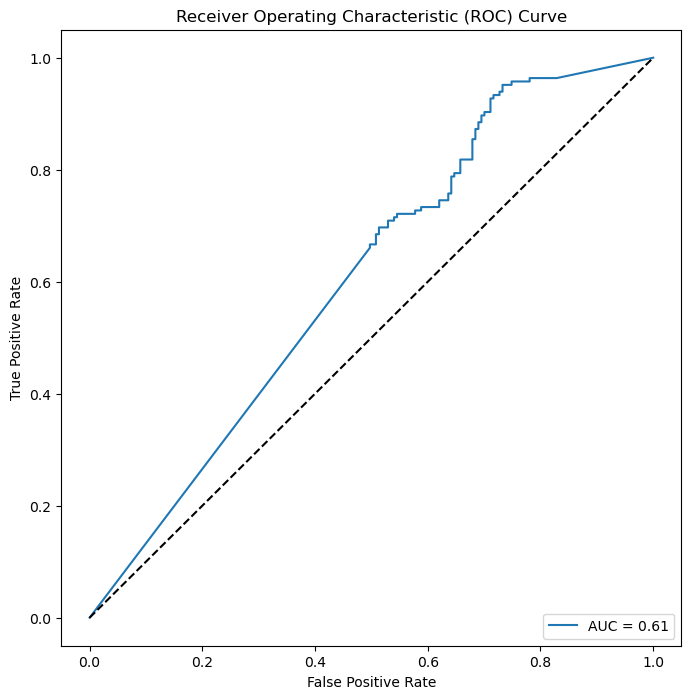

AUC: 0.6071


In [363]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have your X_train, X_test, y_train, and y_test

# Train LogisticRegressionCV model
logm1 = LogisticRegressionCV(cv=5)  # You can adjust the number of cross-validation folds (cv)
logm1.fit(X_train, y_train)

y_probs = logm1.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC
auc_value = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc_value:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC value
print(f'AUC: {auc_value:.4f}')

In [364]:
# Create a Logistic Regression model with balanced class weights
clf = LogisticRegression(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 95  92]
 [ 57 108]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.51      0.56       187
           1       0.54      0.65      0.59       165

    accuracy                           0.58       352
   macro avg       0.58      0.58      0.58       352
weighted avg       0.59      0.58      0.58       352

